# Predicting a song's success in a list of most played songs

In [252]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [214]:
url = "https://es.wikipedia.org/wiki/Anexo:Canciones_m%C3%A1s_reproducidas_en_Spotify"

In [215]:
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [216]:
soup = BeautifulSoup(response.content, "html.parser")

In [217]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Anexo:Canciones más reproducidas en Spotify - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"a767be86-b1b3-4599-b799-4568ebbd8a54","wgCSPNonce":false,"wgCanonicalNamespace":"Anexo","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":104,"wgPageName":"Anexo:Canciones_más_reproducidas_en_Spotify","wgTitle":"Canciones más reproducidas en Spotify","wgCurRevisionId":143563772,"wgRevisionId":143563772,"wgArticleId":9533912,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Páginas con plantil

In [218]:
prestab = soup.select("table")[0]

prestab.select("tr td")

[<td><a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a></td>,
 <td><a href="/wiki/Ed_Sheeran" title="Ed Sheeran">Ed Sheeran</a></td>,
 <td><a href="/wiki/%C3%B7_(%C3%A1lbum)" title="÷ (álbum)"><i>÷</i></a></td>,
 <td align="center">3,123</td>,
 <td align="center">6 de enero de 2017
 </td>,
 <td><a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a></td>,
 <td><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>,
 <td><i><a href="/wiki/After_Hours_(%C3%A1lbum_de_The_Weeknd)" title="After Hours (álbum de The Weeknd)">After Hours</a></i></td>,
 <td align="center">2,942</td>,
 <td align="right">29 de noviembre de 2019
 </td>,
 <td><a href="/wiki/Dance_Monkey" title="Dance Monkey">Dance Monkey</a></td>,
 <td><a href="/wiki/Tones_and_I" title="Tones and I">Tones and I</a></td>,
 <td><i><a href="/wiki/The_Kids_Are_Coming" title="The Kids Are Coming">The Kids Are Coming</a></i> y <i>Welcome to the Madhouse</i></td>,
 <td align="center">2,555</t

In [219]:
song = []
for title in prestab.select("tr td:nth-child(2)"):
    song.append(title.get_text())
    #print(title.get_text())

In [220]:
song

['Shape of You',
 'Blinding Lights',
 'Dance Monkey',
 'Rockstar',
 'Someone You Loved',
 'One Dance',
 'Sunflower',
 'Closer',
 'Señorita',
 'Believer',
 'Perfect',
 'Bad Guy',
 "Say You Won't Let Go",
 'Thinking Out Loud',
 'Lucid Dreams',
 "God's Plan",
 "Don't Start Now",
 'Photograph',
 'Sad!',
 'Starboy',
 'Something Just Like This',
 'Bohemian Rhapsody',
 'Shallow',
 'Love Yourself',
 'Lovely',
 'Stay',
 'All of Me',
 'Havana',
 'Watermelon Sugar',
 'Take Me to Church',
 'Circles',
 '7 Rings',
 'Thunder',
 'Jocelyn Flores',
 'Goosebumps',
 'XO Tour Llif3',
 'New Rules',
 'Stressed Out',
 'Happier',
 'Sicko Mode',
 'Humble',
 'Sorry',
 'Lean On',
 'Let Her Go',
 'Better Now',
 'Heat Waves',
 'Roses - Imanbek Remix',
 'Wake Me Up',
 'Let Me Love You',
 'Faded',
 'Congratulations',
 'Counting Stars',
 "Don't Let Me Down",
 'I Took a Pill in Ibiza (Seeb Remix)',
 'Despacito (Remix)',
 'Stay with Me',
 'Treat You Better',
 "I Don't Care",
 'Riptide',
 'Without Me',
 'Thank U, Next',


In [221]:
artist = []
for title in prestab.select("tr td:nth-child(3)"):
    artist.append(title.get_text())
    #print(title.get_text())
#mw-content-text > div.mw-parser-output > table:nth-child(9) > tbody > tr:nth-child(4) > td:nth-child(3)

In [222]:
artist

['Ed Sheeran',
 'The Weeknd',
 'Tones and I',
 'Post Malone, 21 Savage',
 'Lewis Capaldi',
 'Drake, Wizkid y Kyla',
 'Post Malone, Swae Lee',
 'The Chainsmokers, Halsey',
 'Shawn Mendes, Camila Cabello',
 'Imagine Dragons',
 'Ed Sheeran',
 'Billie Eilish',
 'James Arthur',
 'Ed Sheeran',
 'Juice WRLD',
 'Drake',
 'Dua Lipa',
 'Ed Sheeran',
 'XXXTentacion',
 'The Weeknd, Daft Punk',
 'The Chainsmokers, Coldplay',
 'Queen',
 'Lady Gaga, Bradley Cooper',
 'Justin Bieber',
 'Billie Eilish, Khalid',
 'The Kid Laroi, Justin Bieber',
 'John Legend',
 'Camila Cabello, Young Thug',
 'Harry Styles',
 'Hozier',
 'Post Malone',
 'Ariana Grande',
 'Imagine Dragons',
 'XXXTentacion',
 'Travis Scott',
 'Lil Uzi Vert',
 'Dua Lipa',
 'Twenty One Pilots',
 'Marshmello, Bastille',
 'Travis Scott',
 'Kendrick Lamar',
 'Justin Bieber',
 'Major Lazer, DJ Snake, MØ',
 'Passenger',
 'Post Malone',
 'Glass Animals',
 'SAINt JHN, Imanbek',
 'Avicii, Aloe Blacc',
 'Dj Snake, Justin Bieber',
 'Alan Walker',
 'Pos

In [223]:
replays = []
for title in prestab.select("tr td:nth-child(5)"):
    replays.append(title.get_text())
    #print(title.get_text())
    

In [224]:
replays

['3,123',
 '2,942',
 '2,555',
 '2,413',
 '2,342',
 '2,301',
 '2,281',
 '2,273',
 '2,128',
 '2,076',
 '2,050',
 '2,041',
 '2,015',
 '1,989',
 '1,946',
 '1,935',
 '1,886',
 '1,858',
 '1,821',
 '1,819',
 '1,806',
 '1,797',
 '1,792',
 '1,788',
 '1,782',
 '1,775',
 '1,755',
 '1,746',
 '1,740',
 '1,725',
 '1,725',
 '1,719',
 '1,719',
 '1,716',
 '1,710',
 '1,684',
 '1,681',
 '1,651',
 '1,648',
 '1,640',
 '1,622',
 '1,615',
 '1,612',
 '1,598',
 '1,578',
 '1,577',
 '1,575',
 '1,568',
 '1,567',
 '1,560',
 '1,552',
 '1,552',
 '1,551',
 '1,533',
 '1,532',
 '1,524',
 '1,523',
 '1,519',
 '1,518',
 '1,503',
 '1,503',
 '1,501',
 '1,500',
 '1,498',
 '1,475',
 '1,463',
 '1,454',
 '1,453',
 '1,453',
 '1,452',
 '1,451',
 '1,441',
 '1,426',
 '1,423',
 '1,418',
 '1,417',
 '1,416',
 '1,412',
 '1,406',
 '1,396',
 '1,392',
 '1,391',
 '1,390',
 '1,387',
 '1,387',
 '1,382',
 '1,381',
 '1,380',
 '1,365',
 '1,365',
 '1,362',
 '1,359',
 '1,358',
 '1,356',
 '1,352',
 '1,346',
 '1,344',
 '1,339',
 '1,330',
 '1,329']

In [225]:
song = pd.DataFrame(song)
artist = pd.DataFrame(artist)
replays = pd.DataFrame(replays)
print(len(song))
print(len(artist))
print(len(replays))

100
100
100


In [226]:
df_1 = pd.concat([replays], axis = 1)
df_1.columns = ['replays (billion)']
df_1 = df_1.replace(',','', regex=True)
df_1 = df_1.astype(float)
df_1 

,replays (billion)
0,3123.0
1,2942.0
2,2555.0
3,2413.0
4,2342.0
...,...
95,1346.0
96,1344.0
97,1339.0
98,1330.0


## Getting access to spotify

In [227]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))

In [228]:
secrets_file = open("secrets.txt","r")

In [229]:
string = secrets_file.read()

In [230]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [231]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

### Coding in spotify

In [232]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [233]:
# this will take at least around num_pages_in_playlist * (avg_sleep_time + processing_time) = 53 * (2+0.1) = 110 seconds

all_tracks = get_playlist_tracks("2YRe7HRKNRvXdJBp9nXFza")
len(all_tracks)

794

In [234]:
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

In [235]:
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [236]:
#flattening is not in the standard library but used a lot. you'll thank me later
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]


In [237]:
def get_name_artists_from_playlist(input_playlist):
    return list(map(get_name_artist_from_playlist_item, input_playlist))

In [238]:
song_artist = get_name_artists_from_playlist(all_tracks)
len(song_artist)

794

In [239]:
song_artist = [song_artist[i][0] for i in range(len(song_artist))] 


In [240]:
df = pd.DataFrame(song_artist, columns = ['song', 'artist'])
df

,song,artist
0,Shape of You,Ed Sheeran
1,Blinding Lights,The Weeknd
2,Dance Monkey,Tones And I
3,rockstar (feat. 21 Savage),Post Malone
4,Someone You Loved,Lewis Capaldi
...,...,...
789,Lover,Taylor Swift
790,Everybody Talks,Neon Trees
791,Play Date,Melanie Martinez
792,As It Was,Harry Styles


In [241]:
uris = [(all_tracks[i]["track"]["uri"]) for i in range(len(all_tracks))]

uris = pd.DataFrame(uris, columns = ['uri'])
uris

,uri
0,spotify:track:7qiZfU4dY1lWllzX7mPBI3
1,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
2,spotify:track:2N8m6CYs74qQO4mjVcXO30
3,spotify:track:0e7ipj03S05BNilyu5bRzt
4,spotify:track:7qEHsqek33rTcFNT9PFqLf
...,...
789,spotify:track:1dGr1c8CrMLDpV6mPbImSI
790,spotify:track:2iUmqdfGZcHIhS3b9E9EWq
791,spotify:track:4DpNNXFMMxQEKl7r0ykkWA
792,spotify:track:4LRPiXqCikLlN15c3yImP7


In [242]:
sau_df = pd.concat([df, uris], axis = 1)
sau_df

,song,artist,uri
0,Shape of You,Ed Sheeran,spotify:track:7qiZfU4dY1lWllzX7mPBI3
1,Blinding Lights,The Weeknd,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
2,Dance Monkey,Tones And I,spotify:track:2N8m6CYs74qQO4mjVcXO30
3,rockstar (feat. 21 Savage),Post Malone,spotify:track:0e7ipj03S05BNilyu5bRzt
4,Someone You Loved,Lewis Capaldi,spotify:track:7qEHsqek33rTcFNT9PFqLf
...,...,...,...
789,Lover,Taylor Swift,spotify:track:1dGr1c8CrMLDpV6mPbImSI
790,Everybody Talks,Neon Trees,spotify:track:2iUmqdfGZcHIhS3b9E9EWq
791,Play Date,Melanie Martinez,spotify:track:4DpNNXFMMxQEKl7r0ykkWA
792,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7


In [243]:
sau_df = sau_df[~ sau_df['uri'].str.contains('spotify:local')]


In [244]:
audio_features = [sp.audio_features(i) for i in sau_df['uri']]


In [245]:
audio_features = [audio_features[i][0] for i in range(len(audio_features))] 


In [246]:
af_df = pd.DataFrame.from_dict(data = audio_features, orient = 'columns').pivot_table(index = 'uri').reset_index()
#este from_dict es para hacer un data frame de un diccionario
af_df


,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,spotify:track:017PF4Q3l4DBUiWoXk4OWT,0.16700,0.730,221820,0.729,0.000001,4,0.3490,-3.434,0,0.0884,113.011,4,0.467
1,spotify:track:023OVLNzXhX0j7CxswUt6D,0.14100,0.780,180560,0.680,0.000012,4,0.1380,-6.081,1,0.0305,118.026,4,0.594
2,spotify:track:02M6vucOvmRfMxTXDUwRXu,0.01280,0.747,213507,0.705,0.000000,9,0.1260,-5.137,0,0.1260,136.024,4,0.560
3,spotify:track:02MWAaffLxlfxAUY7c5dvx,0.44000,0.761,238805,0.525,0.000007,11,0.0921,-6.900,1,0.0944,80.870,4,0.531
4,spotify:track:02dRkCEc8Q5ch4TTcnLxOn,0.00987,0.601,217099,0.794,0.000001,7,0.4180,-5.844,0,0.0671,114.066,4,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,spotify:track:7yNX3ZFBWZoR52pbeU4Mcl,0.61500,0.600,225882,0.412,0.002600,5,0.1340,-9.343,0,0.3440,113.050,5,0.408
790,spotify:track:7ycWLEP1GsNjVvcjawXz3z,0.06090,0.854,205040,0.569,0.081600,5,0.1000,-8.151,0,0.1060,80.015,4,0.294
791,spotify:track:7ytR5pFWmSjzHJIeQkgog4,0.24700,0.746,181733,0.690,0.000000,11,0.1010,-7.956,1,0.1640,89.977,4,0.497
792,spotify:track:7zFXmv6vqI4qOt4yGf3jYZ,0.42200,0.658,278180,0.294,0.000052,4,0.0749,-8.533,0,0.0321,74.038,4,0.358


In [247]:
final_df = sau_df.merge(right = af_df, on = 'uri')
final_df = pd.concat([final_df, df_1], axis = 1)
final_df

,song,artist,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,replays (billion)
0,Shape of You,Ed Sheeran,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,233713,0.652,0.000000,1,0.0931,-3.183,0,0.0802,95.977,4,0.931,3123.0
1,Blinding Lights,The Weeknd,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334,2942.0
2,Dance Monkey,Tones And I,spotify:track:2N8m6CYs74qQO4mjVcXO30,0.69000,0.824,209438,0.587,0.000105,6,0.1490,-6.401,0,0.0937,98.029,4,0.514,2555.0
3,rockstar (feat. 21 Savage),Post Malone,spotify:track:0e7ipj03S05BNilyu5bRzt,0.12400,0.585,218147,0.520,0.000070,5,0.1310,-6.136,0,0.0712,159.801,4,0.129,2413.0
4,Someone You Loved,Lewis Capaldi,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.75100,0.501,182161,0.405,0.000000,1,0.1050,-5.679,1,0.0319,109.891,4,0.446,2342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Lover,Taylor Swift,spotify:track:1dGr1c8CrMLDpV6mPbImSI,0.49200,0.359,221307,0.543,0.000016,7,0.1180,-7.582,1,0.0919,68.534,4,0.453,NaN
790,Everybody Talks,Neon Trees,spotify:track:2iUmqdfGZcHIhS3b9E9EWq,0.00301,0.471,177280,0.924,0.000000,8,0.3130,-3.906,1,0.0586,154.961,4,0.725,NaN
791,Play Date,Melanie Martinez,spotify:track:4DpNNXFMMxQEKl7r0ykkWA,0.61200,0.680,179867,0.729,0.000000,5,0.2240,-5.077,1,0.0475,123.970,4,0.446,NaN
792,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,0.34200,0.520,167303,0.731,0.001010,6,0.3110,-5.338,0,0.0557,173.930,4,0.662,NaN


In [248]:
final_df_1 = final_df.drop(final_df.index[100:794])

In [249]:
final_df_1

,song,artist,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,replays (billion)
0,Shape of You,Ed Sheeran,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,233713,0.652,0.000000,1,0.0931,-3.183,0,0.0802,95.977,4,0.931,3123.0
1,Blinding Lights,The Weeknd,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334,2942.0
2,Dance Monkey,Tones And I,spotify:track:2N8m6CYs74qQO4mjVcXO30,0.69000,0.824,209438,0.587,0.000105,6,0.1490,-6.401,0,0.0937,98.029,4,0.514,2555.0
3,rockstar (feat. 21 Savage),Post Malone,spotify:track:0e7ipj03S05BNilyu5bRzt,0.12400,0.585,218147,0.520,0.000070,5,0.1310,-6.136,0,0.0712,159.801,4,0.129,2413.0
4,Someone You Loved,Lewis Capaldi,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.75100,0.501,182161,0.405,0.000000,1,0.1050,-5.679,1,0.0319,109.891,4,0.446,2342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dynamite,BTS,spotify:track:5QDLhrAOJJdNAmCTJ8xMyW,0.01120,0.746,199054,0.765,0.000000,6,0.0936,-4.410,0,0.0993,114.044,4,0.737,1346.0
96,I Fall Apart,Post Malone,spotify:track:75ZvA4QfFiZvzhj2xkaWAh,0.06890,0.556,223347,0.538,0.000000,8,0.1960,-5.408,0,0.0382,143.950,4,0.291,1344.0
97,Levitating (feat. DaBaby),Dua Lipa,spotify:track:5nujrmhLynf4yMoMtj8AQF,0.00883,0.702,203064,0.825,0.000000,6,0.0674,-3.787,0,0.0601,102.977,4,0.915,1339.0
98,Radioactive,Imagine Dragons,spotify:track:4G8gkOterJn0Ywt6uhqbhp,0.10600,0.448,186813,0.784,0.000108,9,0.6680,-3.686,1,0.0627,136.245,4,0.236,1330.0


In [253]:
numericals_1 = final_df_1.select_dtypes(include = np.number)

In [254]:
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


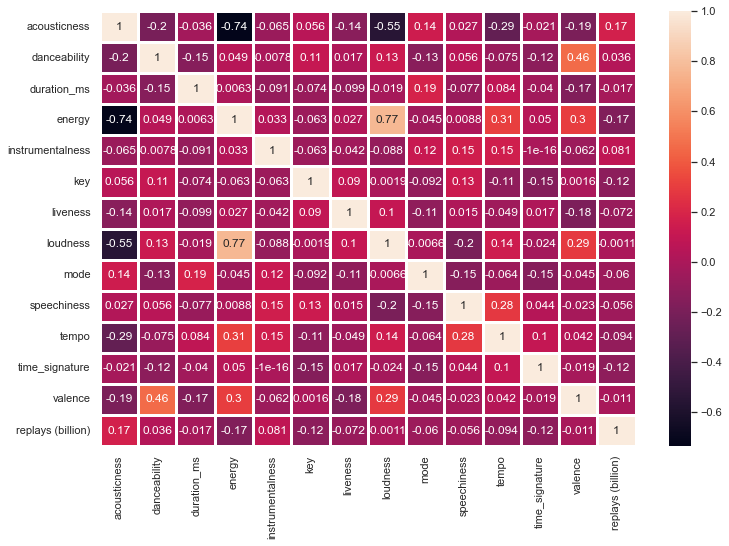

In [255]:
correlations_matrix = numericals_1.corr()
sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
plt.show()